# __Solving flow in a DFN (steady state)__

### Problem statement

We present the resolution of flow, that is, solving the Darcy problem in steady state on a fractured rock with impervious rock matrix.
<br>
Flow equations are solved on a meshed DFN.

<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/flow.png" width="800"/>
</div>
<br>
Solving flow on a meshed DFN
</center>


### Theoretical background

The equation system is the following:
<center>
$ \nabla \cdot q = 0$ <br/>
$ q = T \nabla h $
</center>
with $h$ the hydraulic head, $q$ the Darcy flow, and $T$ the transmissivity.



In DFN.Lab, the Darcy equations are solved with a mixed-hybrid finite-element method. 
<br>The mixed-hybrid finite element method introduce a Lagrange multiplier to ensure mass conservation at fracture intersections [(Maryška et al., 2005)](https://link.springer.com/article/10.1007/s10596-005-0152-3). 


### What will you learn ?
* Solving flow on a meshed DFN
* Get some flow metrics (indicators)

### DFN.Lab model

The required module is __Flow__.

We assume that the reader is familiar with the [Meshing tutorial](008-Meshing.ipynb).

In [1]:
import pyvista
import dfnlab.System as sys
import dfnlab.Domains as dom
import dfnlab.Fractures as dfn
import dfnlab.FlowBoundaryConditions as bc
import dfnlab.Mesh as mesh 
import dfnlab.Flow as flow
import dfnlab.MaterialProperties as mat
import numpy as np
import os

-------------------------------------

### Meshing
The DFN meshed in [Tutorial 11](011-Meshing.ipynb) is loaded.

In [2]:
system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=1.)
system.setDomain(domain)
fnet = dfn.DFN()
system.setDFN(fnet)
dfn.load_disk_file(fnet,filename='sources/Ktest.disk')
system.build()

number of intersections 24


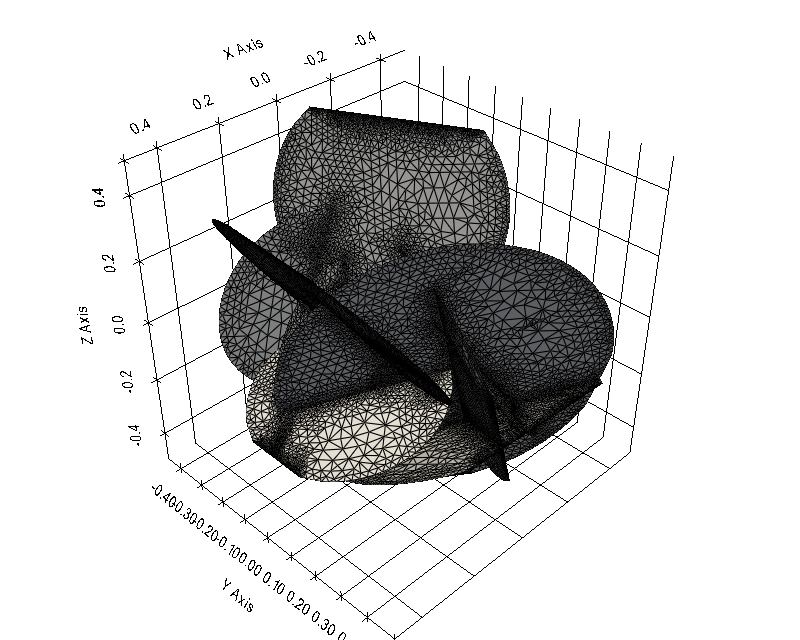

In [3]:
meshDFN = mesh.Mesh(system)  
meshDFN.load("sources/MeshExamples/KTestFine/")
from sources.functions import plot_mesh
plot_mesh(meshDFN)

### Boundary conditions
Before solving the flow, it is required to assign boundary condition. Here, permeameter-like conditions in the z-direction are used.

In [4]:
bc.FlowBoundaryCondition.setPermeameter(domain=domain,deltahead=10,direction=np.array([0,0,1]))

### Hydraulic properties
We also need to assign transmissivities to fractures. Here $T=1$ is set for all fractures.

In [5]:
mat.Transmissivities.setConstant(dfn=fnet,value=1)

### __Solving the Darcy equation__

Solving the flow in DFN.Lab returns a _Flow_ object containing hydraulic heads and velocities for all triangles in the mesh.

In [6]:
flow_system = flow.solveDarcyProblem(meshDFN)

solveDarcyProblem
61899
Linear system building 
Taking account of the boundary conditions
Linear System solving
compute the indicators


Plot the hydraulic heads in the DFN

Number of mesh elements: 61899


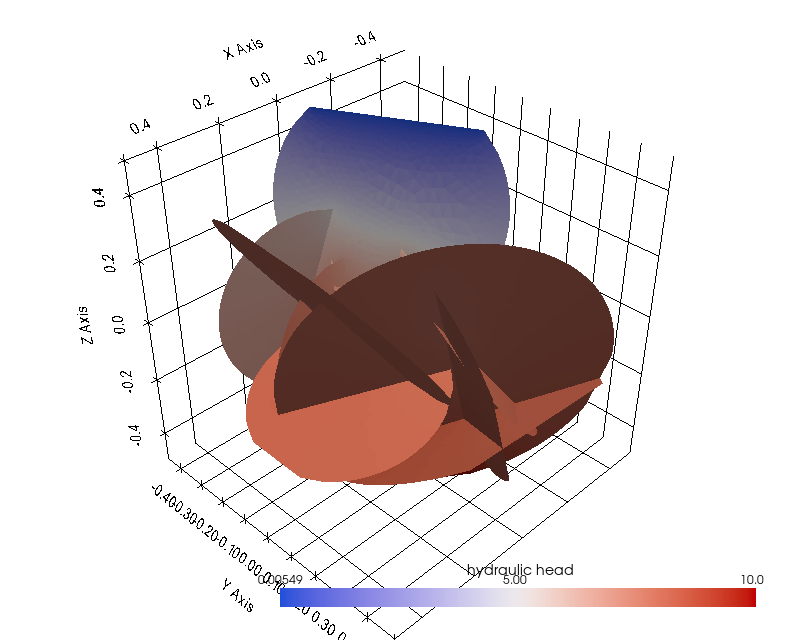

In [7]:
print("Number of mesh elements: {}".format(meshDFN.numTriangles()))
plot_mesh(meshDFN,flow_system.getHead(),"hydraulic head")